### 4. Support Vector Machine

In [30]:
import pandas as pd
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('df_next.csv')
data = data.drop(columns="Unnamed: 0")
data.head(-20)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0000
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0000
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0000
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0000
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
357916,7.0,32.0,70.0,2.0,4.0,69.0,3.0,4.0,138.0,5.0,1.0,1.0000
357917,7.0,17.0,11.0,2.0,10.0,12.0,4.0,10.0,25.0,9.0,1.0,20.1772
357918,7.0,2.0,75.0,0.0,7.0,72.0,0.0,7.0,142.0,2.0,1.0,10.0000
357919,7.0,26.0,49.0,2.0,16.0,49.0,4.0,16.0,98.0,9.0,1.0,20.0950


In [39]:
y = data.iloc[:,0].values
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
classes = y.shape[1]

X = data.iloc[:,1:].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
print("Shape_train:", X_train.shape, "\n"
      "Shape_test: ", X_test.shape, "\n"
      "Shape_y:    ", y.shape)

Shape_train: (239820, 11) 
Shape_test:  (118121, 11) 
Shape_y:     (357941, 8)


In [40]:
scaler = StandardScaler()
clf = OneVsRestClassifier(LinearSVC())

steps = [('normalizer', scaler),('classifier', clf)]
pipe_svc_ = Pipeline(steps)

In [41]:
pipe_svc = pipe_svc_.fit(X_train, y_train)

y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)
y_score_svc = pipe_svc.decision_function(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import matthews_corrcoef
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sn
import itertools

In [43]:
target_names = ['DoS', 'Data_probing', 'Malitious_control', 'Malitious_operation', 'Scan',
                'Spying', 'Wrong_SetUp', 'Normal']
print(classification_report(y_train, y_pred_train, target_names=target_names))
print(classification_report(y_test, y_pred_test, target_names=target_names))

                     precision    recall  f1-score   support

                DoS       0.96      0.65      0.77      3821
       Data_probing       1.00      0.59      0.74       212
  Malitious_control       0.94      0.92      0.93       586
Malitious_operation       1.00      0.14      0.25       547
               Scan       1.00      0.11      0.20      1043
             Spying       0.00      0.00      0.00       370
        Wrong_SetUp       1.00      1.00      1.00        78
             Normal       0.98      1.00      0.99    233163

          micro avg       0.98      0.99      0.98    239820
          macro avg       0.86      0.55      0.61    239820
       weighted avg       0.98      0.99      0.98    239820
        samples avg       0.98      0.99      0.98    239820

                     precision    recall  f1-score   support

                DoS       0.97      0.66      0.79      1959
       Data_probing       1.00      0.58      0.73       130
  Malitious_control 

##### Confusion matrix multiclass(SVM)

In [44]:
confusion_m = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

def confusion_matrix(confusion_m, classes,
                          normalize=False,
                          title=' ',
                          cmap=plt.cm.BuPu):

    if normalize:
        confusion_m = confusion_m.astype('float') / confusion_m.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix (Normalized)")
    else:
        print('Confusion matrix (without_normalization)')

    print(confusion_m)

    plt.imshow(confusion_m, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = confusion_m.max() / 2.
    for i, j in itertools.product(range(confusion_m.shape[0]), range(confusion_m.shape[1])):
        plt.text(j, i, format(confusion_m[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if confusion_m[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix (without_normalization)
[[  1298      0      0      0      0      0      0    661]
 [     0     75      0      0      0      0      0     55]
 [     0      0    279      0      0      0      0     24]
 [    44      0      0     38      0      0      0    176]
 [     5      0     20      0     68      0      0    411]
 [     0      0      0      0      0      0      0    162]
 [     0      0      0      0      0      0     44      0]
 [   148      0      0      0      0      0      0 114613]]


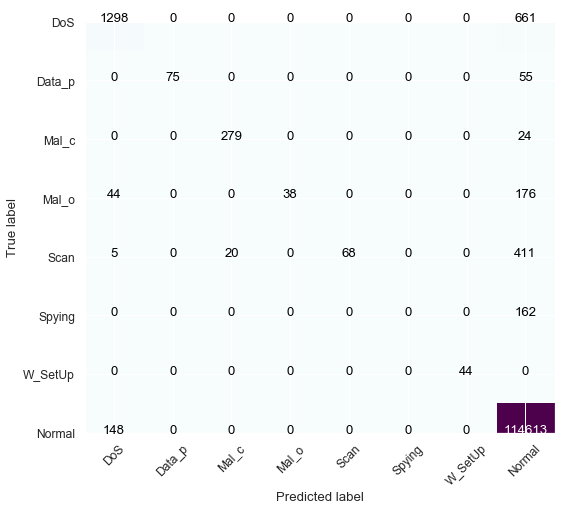

In [45]:
plt.figure(figsize = (8,8))
sn.set(font_scale=1.1)

confusion_matrix(confusion_m,['DoS', 'Data_p', 'Mal_c', 'Mal_o', 'Scan',
                'Spying', 'W_SetUp', 'Normal'])
plt.show()

##### Matthews correlation coefficient (SVM)

In [47]:
matthews_corrcoef(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

0.7006745471721686